In [1]:
import numpy as np
import pandas as pd
iris_df=pd.read_csv('C:/Users/1202r/Iris.csv')
iris_df.shape

(150, 6)

In [2]:
X=iris_df.iloc[:,1:5].values
y=iris_df['Species'].values
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
iris_df['Species_encoded'] = le_encoder.fit_transform(iris_df['Species'])


In [3]:
iris_df['Species_encoded'].value_counts()

Species_encoded
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=12)

from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=5)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [5]:
import numpy as np
import pandas as pd
driver_df=pd.read_csv('C:/Users/1202r/driver-data.csv')
driver_df.shape

(4000, 3)

In [6]:
driver_df.describe

<bound method NDFrame.describe of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>

In [7]:
import matplotlib.pyplot as plt
#plt.scatter(driver_df['mean_dist_day'], driver_df['mean_over_speed_perc'])


In [8]:
from sklearn.cluster  import KMeans
kmeans_model=KMeans(n_clusters=2)
final_df=driver_df.drop('id',axis=1)
kmeans_model.fit(final_df)

C:\Users\1202r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [9]:
kmeans_model.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [10]:
final_df['cluster_id']=kmeans_model.labels_


In [11]:
final_df['cluster_id'].value_counts()

cluster_id
1    3200
0     800
Name: count, dtype: int64

<Axes: xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

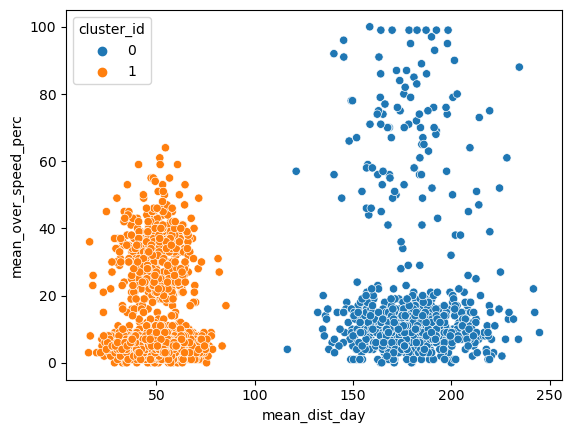

In [12]:
import seaborn as sns
sns.scatterplot(x='mean_dist_day',y='mean_over_speed_perc',data=final_df, hue='cluster_id')